In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
df_stETH = pd.read_csv('stETH.csv')
df_stETH
df_stETH = df_stETH[['End', 'Close']]
df_stETH.columns = ['Date', 'Price_STETH']
df_stETH

,Date,Price_STETH
0,2025-03-10,2017.960900
1,2025-03-09,2200.387200
2,2025-03-08,2139.765000
3,2025-03-07,2206.644000
4,2025-03-06,2244.683900
...,...,...
1534,2020-12-27,629.066656
1535,2020-12-26,624.800420
1536,2020-12-25,611.504712
1537,2020-12-24,596.767711


In [45]:
df_BTC = pd.read_csv('BTC.csv')
a = pd.to_datetime(df_BTC['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для BTC: {a}")

df_BNB = pd.read_csv('BNB.csv')
a = pd.to_datetime(df_BNB['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для BNB: {a}")

df_Cardano = pd.read_csv('Cardano.csv')
a = pd.to_datetime(df_Cardano['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для Cardano: {a}")

df_Dogecoin = pd.read_csv('Dogecoin.csv')
a = pd.to_datetime(df_Dogecoin['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для Dogecoin: {a}")

df_ETH = pd.read_csv('ETH.csv')
a = pd.to_datetime(df_ETH['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для ETH: {a}")

df_Solana = pd.read_csv('Solana.csv')
a = pd.to_datetime(df_Solana['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для Solana: {a}")

df_USDt = pd.read_csv('USDt.csv')
a = pd.to_datetime(df_USDt['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для USDt: {a}")

df_USDC = pd.read_csv('USDC.csv')
a = pd.to_datetime(df_USDC['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для USDC: {a}")

df_XRP = pd.read_csv('XRP.csv')
a = pd.to_datetime(df_XRP['Дата'], format='%d.%m.%Y').min()
print(f"Минимальная дата для XRP: {a}")

Минимальная дата для BTC: 2012-02-02 00:00:00
Минимальная дата для BNB: 2017-11-09 00:00:00
Минимальная дата для Cardano: 2017-12-31 00:00:00
Минимальная дата для Dogecoin: 2017-06-03 00:00:00
Минимальная дата для ETH: 2016-03-10 00:00:00
Минимальная дата для Solana: 2020-07-13 00:00:00
Минимальная дата для USDt: 2017-04-14 00:00:00
Минимальная дата для USDC: 2018-12-06 00:00:00
Минимальная дата для XRP: 2015-01-22 00:00:00


In [46]:
def convert_percentage_column(df, column_name):
    try:
        # Удаляем символ '%' и заменяем ',' на '.'
        df[column_name] = df[column_name].str.replace('%', '').str.replace(',', '.')

        # Функция для удаления первой точки, если их две
        def remove_first_dot(x):
            if isinstance(x, str) and x.count('.') == 2:
                first_dot_index = x.find('.')
                return x[:first_dot_index] + x[first_dot_index + 1:]
            return x

        # Применяем функцию к столбцу
        df[column_name] = df[column_name].apply(remove_first_dot)

        # Преобразуем столбец в числовой тип
        df[column_name] = pd.to_numeric(df[column_name], errors='raise')

        # Делим на 100 для получения процентного значения
        df[column_name] = df[column_name] / 100.0
        return df

    except KeyError:
        print(f"Error: Column '{column_name}' not found in DataFrame.")
        return df

    except ValueError:
        print(f"Error: Could not convert column '{column_name}' to numeric. "
              f"Check if all values have the correct format (e.g., '-1,41%').")
        return df

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return df

In [47]:
df_BTC = df_BTC[['Дата', 'Цена']]
df_BTC.columns = ['Date', 'Price_BTC']

In [48]:
df_ETH = df_ETH[['Дата', 'Цена']]
df_ETH.columns = ['Date', 'Price_ETH']

In [49]:
df_XRP = df_XRP[['Дата', 'Цена']]
df_XRP.columns = ['Date', 'Price_XRP']

In [50]:
df_BNB = df_BNB[['Дата', 'Цена']]
df_BNB.columns = ['Date', 'Price_BNB']

In [51]:
df_Cardano = df_Cardano[['Дата', 'Цена']]
df_Cardano.columns = ['Date', 'Price_Cardano']

In [52]:
df_Dogecoin = df_Dogecoin[['Дата', 'Цена']]
df_Dogecoin.columns = ['Date', 'Price_Dogecoin']

In [53]:
df_USDt = df_USDt[['Дата', 'Цена']]
df_USDt.columns = ['Date', 'Price_USDt']

df_USDC = df_USDC[['Дата', 'Цена']]
df_USDC.columns = ['Date', 'Price_USDC']

df_Solana = df_Solana[['Дата', 'Цена']]
df_Solana.columns = ['Date', 'Price_Solana']

In [54]:
def set_date_as_index(df, date_column_name):
  """Преобразует столбец DataFrame Pandas в дату и устанавливает его в качестве индекса
  """

  # Преобразуем столбец в дату
  df[date_column_name] = pd.to_datetime(df[date_column_name])

  # Устанавливаем столбец в качестве индекса
  df = df.set_index(date_column_name)

  return df

In [55]:
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'], format='%d.%m.%Y')
df_XRP['Date'] = pd.to_datetime(df_XRP['Date'], format='%d.%m.%Y')
df_BNB['Date'] = pd.to_datetime(df_BNB['Date'], format='%d.%m.%Y')
df_Cardano['Date'] = pd.to_datetime(df_Cardano['Date'], format='%d.%m.%Y')
df_Dogecoin['Date'] = pd.to_datetime(df_Dogecoin['Date'], format='%d.%m.%Y')
df_ETH['Date'] = pd.to_datetime(df_ETH['Date'], format='%d.%m.%Y')
df_Solana['Date'] = pd.to_datetime(df_Solana['Date'], format='%d.%m.%Y')
df_USDt['Date'] = pd.to_datetime(df_USDt['Date'], format='%d.%m.%Y')
df_USDC['Date'] = pd.to_datetime(df_USDC['Date'], format='%d.%m.%Y')

In [56]:
df_Cardano

,Date,Price_Cardano
0,2025-03-10,"0,6974"
1,2025-03-09,"0,7199"
2,2025-03-08,"0,8048"
3,2025-03-07,"0,8186"
4,2025-03-06,"0,9063"
...,...,...
2621,2018-01-04,"1,1043"
2622,2018-01-03,"1,0800"
2623,2018-01-02,"0,7620"
2624,2018-01-01,"0,7022"


In [57]:
df_BNB = set_date_as_index(df_BNB, 'Date')
df_Cardano = set_date_as_index(df_Cardano, 'Date')
df_Dogecoin = set_date_as_index(df_Dogecoin, 'Date')
df_ETH = set_date_as_index(df_ETH, 'Date')
df_Solana = set_date_as_index(df_Solana, 'Date')
df_stETH = set_date_as_index(df_stETH, 'Date')
df_USDt = set_date_as_index(df_USDt, 'Date')
df_USDC = set_date_as_index(df_USDC, 'Date')
df_BTC = set_date_as_index(df_BTC, 'Date')
df_XRP = set_date_as_index(df_XRP, 'Date')

In [58]:
# 1. Создание DataFrame с общим индексом дат
start_date = '2015-01-01'
end_date = '2025-02-02'
date_range = pd.date_range(start=start_date, end=end_date, name='Date')
common_df = pd.DataFrame(index=date_range)

# 2. Пример создания 10 DataFrame (замените это своим кодом загрузки данных)
def create_sample_df(num):
    dates = pd.date_range(start='2015-01-15', end='2025-01-15', freq='M')
    returns = np.random.randn(len(dates))
    df = pd.DataFrame({'Return' + str(num): returns}, index=dates)
    df.index.name = 'Date'
    return df

In [59]:
common_df = common_df.join(df_BTC, how='left')
common_df = common_df.join(df_XRP, how='left')
common_df = common_df.join(df_BNB, how='left')
common_df = common_df.join(df_Cardano, how='left')
common_df = common_df.join(df_Dogecoin, how='left')
common_df = common_df.join(df_ETH, how='left')
common_df = common_df.join(df_Solana, how='left')
common_df = common_df.join(df_stETH, how='left')
common_df = common_df.join(df_USDt, how='left')
common_df = common_df.join(df_USDC, how='left')

In [60]:
# Получили цены криптовалют
common_df

,Price_BTC,Price_XRP,Price_BNB,Price_Cardano,Price_Dogecoin,Price_ETH,Price_Solana,Price_STETH,Price_USDt,Price_USDC
Date,,,,,,,,,,
2015-01-01,"313,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,"315,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,"282,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,"258,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,"273,2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-29,"103.780,0","3,0679","667,78","0,9400","0,323964","3.113,26","227,948",3074.9516,"1,0000","1,0000"
2025-01-30,"104.740,0","3,1274","677,43","0,9596","0,331504","3.247,22","238,667",3113.0711,"1,0001","0,9999"
2025-01-31,"102.470,0","3,0349","677,48","0,9423","0,328821","3.298,69","231,749",3247.2291,"0,9997","1,0003"


In [61]:
for col in common_df.columns:
    try:
        common_df[col] = common_df[col].str.replace(',', '.').astype(float)
    except:
        print(col)

Price_BTC
Price_ETH
Price_STETH


In [62]:
# Удаляем точки в выделенных колонках
for col in ['Price_BTC', 'Price_ETH']:
    if col in common_df.columns:
        common_df[col] = common_df[col].astype(str).str.replace('.', '', regex=False)

In [64]:
common_df.head()

,Price_BTC,Price_XRP,Price_BNB,Price_Cardano,Price_Dogecoin,Price_ETH,Price_Solana,Price_STETH,Price_USDt,Price_USDC
Date,,,,,,,,,,
2015-01-01,"313,9",NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
2015-01-02,"315,1",NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
2015-01-03,"282,0",NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
2015-01-04,"258,8",NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
2015-01-05,"273,2",NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN


In [65]:
# Снова
for col in common_df.columns:
    try:
        common_df[col] = common_df[col].str.replace(',', '.').astype(float)
    except:
        print(col)

Price_XRP
Price_BNB
Price_Cardano
Price_Dogecoin
Price_Solana
Price_STETH
Price_USDt
Price_USDC


In [70]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3686 entries, 2015-01-01 to 2025-02-02
Freq: D
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price_BTC       3684 non-null   float64
 1   Price_XRP       3664 non-null   float64
 2   Price_BNB       2643 non-null   float64
 3   Price_Cardano   2590 non-null   float64
 4   Price_Dogecoin  2802 non-null   float64
 5   Price_ETH       3252 non-null   float64
 6   Price_Solana    1659 non-null   float64
 7   Price_STETH     1503 non-null   float64
 8   Price_USDt      2850 non-null   float64
 9   Price_USDC      2250 non-null   float64
dtypes: float64(10)
memory usage: 316.8 KB


In [233]:
def calculate_crypto_log_returns_safe(df, price_prefix='Price_'):
    """
    Вычисляет логарифмическую доходность для криптовалют
    """
    crypto_cols = [col for col in df.columns if col.startswith(price_prefix)]
    log_return_df = pd.DataFrame(index=df.index)
    for col in crypto_cols:
        # Сохраняем исходные NaN
        log_returns = df[col].copy()
        # Вычисляем только для не-NaN значений
        valid_mask = log_returns.notna()
        log_returns.loc[valid_mask] = np.log(log_returns[valid_mask] / log_returns[valid_mask].shift(1))
        log_return_df[f'{col}_LogReturn'] = log_returns
    return log_return_df

In [234]:
log_common_df = calculate_crypto_log_returns_safe(common_df)

/Users/valery/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Предполагается, что log_returns_df - это DataFrame с колонками логарифмической доходности
# (который мы получили из предыдущей функции calculate_crypto_log_returns_safe)

def plot_crypto_log_returns_histograms(log_returns_df):
    # Создаем фигуру размером 20x10 дюймов
    plt.figure(figsize=(8, 10))
    
    # Настраиваем сетку 2x5
    rows, cols = 5, 2
    
    # Получаем список колонок
    log_return_cols = log_returns_df.columns
    
    # Проходим по всем колонкам и строим гистограммы
    for i, col in enumerate(log_return_cols):
        # Создаем подграфик в нужной позиции
        ax = plt.subplot(rows, cols, i + 1)
        
        # Строим гистограмму для текущей криптовалюты
        sns.histplot(log_returns_df[col].dropna(), bins=30, kde=False, color='blue', ax=ax)
        
        # Настраиваем подписи
        ax.set_xlabel('Log Return')
        # ax.set_ylabel('Frequency')
        ax.set_ylabel('')
        
        # Опционально: извлекаем название криптовалюты из имени колонки
        crypto_name = col.replace('Price_', '').replace('_LogReturn', '')
        ax.set_title(crypto_name)
        
        # Настраиваем сетку
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Настраиваем общий вид
    plt.tight_layout()
    
    # Показываем график
    plt.show()

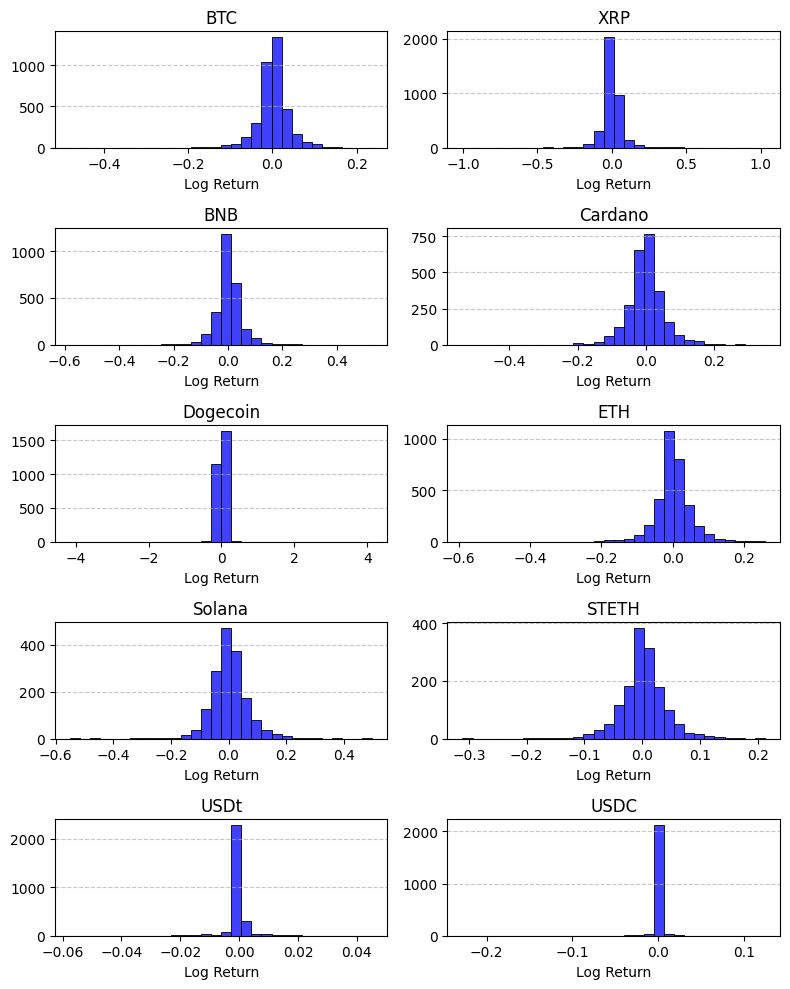

In [104]:
plot_crypto_log_returns_histograms(log_common_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_crypto(df, crypto):
    # Преобразуем столбец к числовому типу, учитывая запятую как десятичный разделитель
    df[crypto] = pd.to_numeric(df[crypto].str.replace(',', '.'), errors='coerce')
    data = df[crypto].dropna()
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data.values, color='#00bcd4')
    plt.title(f'Price of {crypto} over time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Пример использования:
plot_crypto(common_df, 'Price_BNB')

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_cryptos(df, titles=None, figsize=(15, 23)):
    """
    Строит графики для всех колонок с ценами криптовалют в формате сетки 5x2
    """
    # Создаем копию датафрейма для безопасных преобразований
    df__copy = df.copy()
    
    # Cетка 5x2
    fig, axes = plt.subplots(5, 2, figsize=figsize)
    axes = axes.flatten()  # Преобразуем в одномерный массив для удобства
    
    if titles is None:
        titles = df.columns
    
    # Определяем цвета для графиков
    colors = ['#00bcd4', '#ff9800', '#4caf50', '#f44336', '#9c27b0', 
              '#3f51b5', '#e91e63', '#ffc107', '#795548', '#607d8b']
    
    # Перебираем все колонки с данными
    for i, column in enumerate(df__copy.columns):
        if i >= len(axes):  # Если колонок больше, чем осей
            break
        print(i)
        print(column)
        
        df_copy = pd.DataFrame(df__copy[column].dropna())
        df_copy = df_copy[df_copy[column] != 0]
        
        # Преобразуем строковые значения с запятыми в числовые
        if df_copy[column].dtype == 'object':
            df_copy[column] = pd.to_numeric(df_copy[column].str.replace(',', '.'), errors='coerce')
        
        # Удаляем NaN значения для текущей колонки
        data = df_copy[column].dropna()
        
        # Если данные существуют, строим график
        if not data.empty:
            axes[i].plot(data.index, data.values, 
                        color=colors[i % len(colors)], linewidth=2)
            axes[i].set_title(titles[i] if i < len(titles) else column, fontsize=14)
            axes[i].set_xlabel('Дата')
            axes[i].set_ylabel('Цена')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'No Data Available', 
                      horizontalalignment='center', 
                      verticalalignment='center',
                      transform=axes[i].transAxes)
            axes[i].set_title(titles[i] if i < len(titles) else column)
    
    # Скрываем оставшиеся пустые графики, если колонок меньше, чем 10
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


0
Price_BTC
1
Price_XRP
2
Price_BNB
3
Price_Cardano
4
Price_Dogecoin
5
Price_ETH
6
Price_Solana
7
Price_STETH
8
Price_USDt
9
Price_USDC


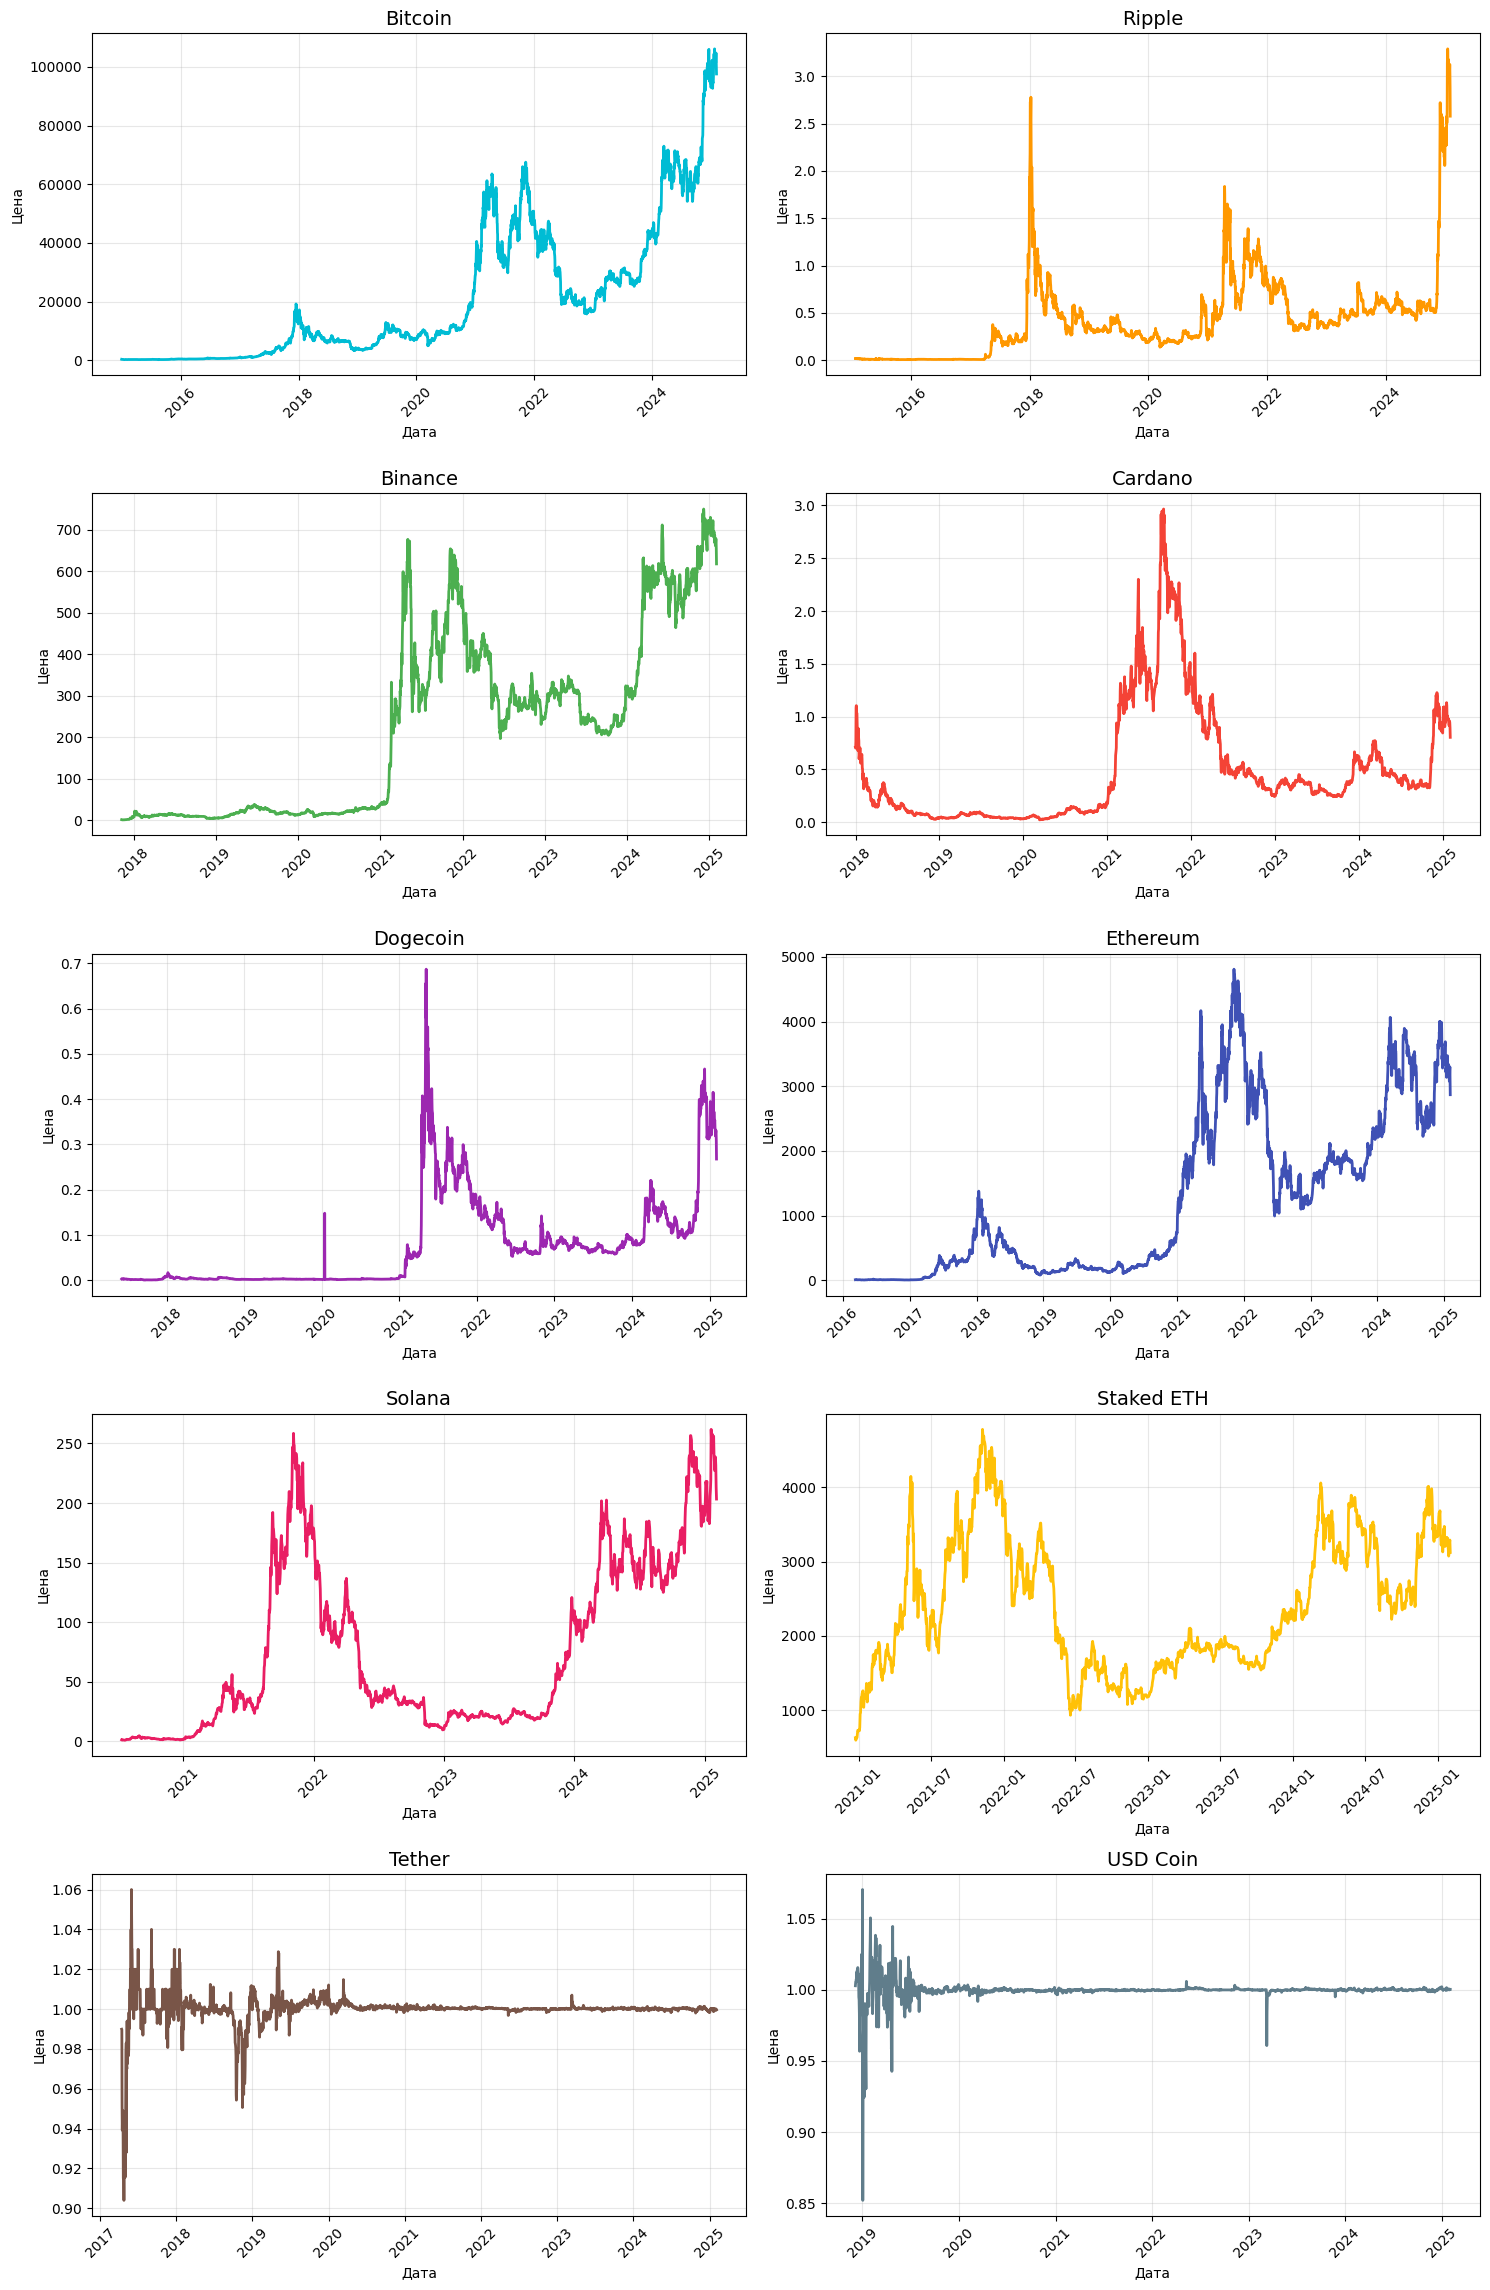

In [137]:
# Использование с пользовательскими заголовками
custom_titles = ["Bitcoin", "Ripple", "Binance", "Cardano", 
                "Dogecoin", "Ethereum", "Solana", "Staked ETH", "Tether", "USD Coin"]
plot_all_cryptos(common_df, titles=custom_titles)

In [120]:
pd.DataFrame(common_df['Price_BTC'].dropna())

,Price_BTC
Date,
2015-01-01,313.9
2015-01-02,315.1
2015-01-03,282.0
2015-01-04,258.8
2015-01-05,273.2
...,...
2025-01-29,103780.0
2025-01-30,104740.0
2025-01-31,102470.0


In [ ]:
common_df['Price_BTC'].values

# Информационный критерий BIC

In [235]:
def process_nan_with_strategy(df):
    processed_df = df.copy()
    
    for col in processed_df.columns:
        # Шаг 0: Заменяем все inf на NaN
        series = processed_df[col].replace([np.inf, -np.inf], np.nan)
        
        # Шаг 1: Находим первый не-NaN индекс
        first_valid_idx = series.first_valid_index()
        
        if first_valid_idx is None:
            # Все значения в колонке NaN
            continue
            
        # Шаг 2: Обрезаем начальные NaN
        trimmed_series = series.loc[first_valid_idx:].copy()
        
        # Шаг 3: Заменяем оставшиеся NaN через интерполяцию
        interpolated_series = trimmed_series.interpolate(
            method='linear',  # Линейная интерполяция между соседями
            limit_area='inside',  # Только между существующими значениями
            limit_direction='both'  # Интерполируем вперед и назад
        )
        
        # Шаг 4: Заполняем крайние NaN
        final_series = interpolated_series.ffill().bfill()
        
        # Обновляем DataFrame
        processed_df[col] = final_series.reindex_like(processed_df[col])
    
    return processed_df

In [236]:
log_common_df = process_nan_with_strategy(log_common_df)

In [252]:
from arch import arch_model
def fit_volatility_models(log_returns_df):
    """
    Сравнивает модели волатильности по критерию BIC с улучшенной обработкой пропусков
    """
    cryptos = [col.replace('Price_', '').replace('_LogReturn', '') 
               for col in log_returns_df.columns]
    models = ['GARCH', 'EGARCH', 'GJR-GARCH']
    bic_results = pd.DataFrame(index=cryptos, columns=models)

    for col in log_returns_df.columns:
        # 1. Находим первый валидный индекс (когда крипта появилась)
        series = log_returns_df[col].dropna()
        
        # Пропускаем колонки без данных
        if series.empty:
            print(f"Предупреждение: В колонке {col} нет данных. Пропускаем.")
            continue
            
        # 2. Обрезаем все NaN до первого появления криптовалюты
        first_valid_idx = series.index[0]
        data = log_returns_df.loc[first_valid_idx:, col].copy()
        
        # 4. Проверяем результаты заполнения
        if data.isna().any():
            print(f"Ошибка: В колонке {col} остались NaN после обработки")
            continue
            
        # 5. Проверка минимального количества наблюдений
        if len(data) < 100:
            print(f"Предупреждение: В колонке {col} только {len(data)} наблюдений")
            continue
            
        try:
            # GARCH(1,1)
            model_garch = arch_model(data, mean='Zero', vol='GARCH', p=1, q=1)
            res_garch = model_garch.fit(disp='off')
            
            # E-GARCH(1,1)
            model_egarch = arch_model(data, mean='Zero', vol='EGARCH', p=1, q=1)
            res_egarch = model_egarch.fit(disp='off')
            
            # GJR-GARCH(1,1)
            model_gjr = arch_model(data, mean='Zero', vol='GARCH', p=1, o=1, q=1)
            res_gjr = model_gjr.fit(disp='off')
            
            crypto_name = col.replace('Price_', '').replace('_LogReturn', '')
            bic_results.loc[crypto_name] = [res_garch.bic, res_egarch.bic, res_gjr.bic]
            
        except Exception as e:
            print(f"Ошибка при обработке {col}: {str(e)}")
            continue

    return bic_results.astype(float)


In [260]:
# fit_volatility_models(log_common_df).to_csv('ststs_volatil.csv')

In [1]:
# Применение функции
# volatility_bic_table = fit_volatility_models(log_common_df)
# volatility_bic_table

In [241]:
volatility_bic_table

,GARCH,EGARCH,GJR-GARCH
BTC,-14295.867177,-1.434830e+04,-14346.022242
XRP,-10194.142477,-1.004840e+04,-10190.815452
BNB,-9185.195685,-9.201758e+03,-9203.270716
Cardano,-8061.381506,-8.099654e+03,-8050.544203
Dogecoin,-6156.089837,-7.141939e+03,-6148.152602
ETH,-10774.425194,-1.079765e+04,-10755.341269
Solana,-4630.990790,-4.616904e+03,-4623.596572
STETH,-5546.351210,-5.576000e+03,-5543.575083
USDt,-29298.200520,6.261655e+06,-29652.732001
USDC,-21676.693845,-2.567922e+04,-22352.482215


In [256]:
from arch import arch_model

def calculate_custom_volatility(log_returns_df, models_dict, scale_factor=1000):
    """
    Рассчитывает волатильность для указанных криптовалют с использованием заданных моделей
    """
    volatility_df = pd.DataFrame(index=log_returns_df.index)
    
    for crypto, model_type in models_dict.items():
        if crypto not in log_returns_df.columns:
            print(f"Предупреждение: Колонка {crypto} не найдена")
            continue
            
        series = log_returns_df[crypto].copy()
        
        # 1. Находим первый валидный индекс
        first_valid = series.first_valid_index()
        if first_valid is None:
            print(f"Предупреждение: Нет данных для {crypto}")
            volatility_df[crypto] = np.nan
            continue
            
        # 2. Обрезаем начальные NaN
        valid_data = series.loc[first_valid:].dropna()
        
        # 3. Проверка минимального количества данных
        if len(valid_data) < 100:
            print(f"Предупреждение: Недостаточно данных для {crypto} ({len(valid_data)} наблюдений)")
            volatility_df[crypto] = np.nan
            continue
            
        try:
            # 4. Масштабирование данных
            scaled_data = valid_data * scale_factor
            
            # 5. Выбор и обучение модели
            if model_type == 'GARCH':
                model = arch_model(scaled_data, mean='Zero', vol='GARCH', p=1, q=1)
            elif model_type == 'EGARCH':
                model = arch_model(scaled_data, mean='Zero', vol='EGARCH', p=1, q=1)
            elif model_type == 'GJR-GARCH':
                model = arch_model(scaled_data, mean='Zero', vol='GARCH', p=1, o=1, q=1)
            else:
                raise ValueError(f"Неизвестный тип модели: {model_type}")
                
            res = model.fit(disp='off')
            
            # 6. Рассчет волатильности
            vol = pd.Series(
                np.sqrt(res.conditional_volatility) / scale_factor,
                index=valid_data.index
            )
            
            # 7. Сборка конечного результата
            volatility_df[crypto] = series.where(series.isna(), vol.reindex(series.index, method='nearest'))
            
        except Exception as e:
            print(f"Ошибка для {crypto} ({model_type}): {str(e)}")
            volatility_df[crypto] = np.nan
    
    return volatility_df

In [2]:
# Словарь методов
models = {
    'Price_BTC_LogReturn': 'EGARCH',
    'Price_XRP_LogReturn': 'GARCH',
    'Price_BNB_LogReturn': 'GJR-GARCH',
    'Price_Cardano_LogReturn': 'EGARCH',
    'Price_Dogecoin_LogReturn': 'EGARCH',
    'Price_ETH_LogReturn': 'EGARCH',
    'Price_Solana_LogReturn': 'GARCH',
    'Price_STETH_LogReturn': 'EGARCH',
    'Price_USDt_LogReturn': 'GJR-GARCH',
    'Price_USDC_LogReturn': 'EGARCH'
}

# Расчет волатильности
volatility = calculate_custom_volatility(log_common_df, models)

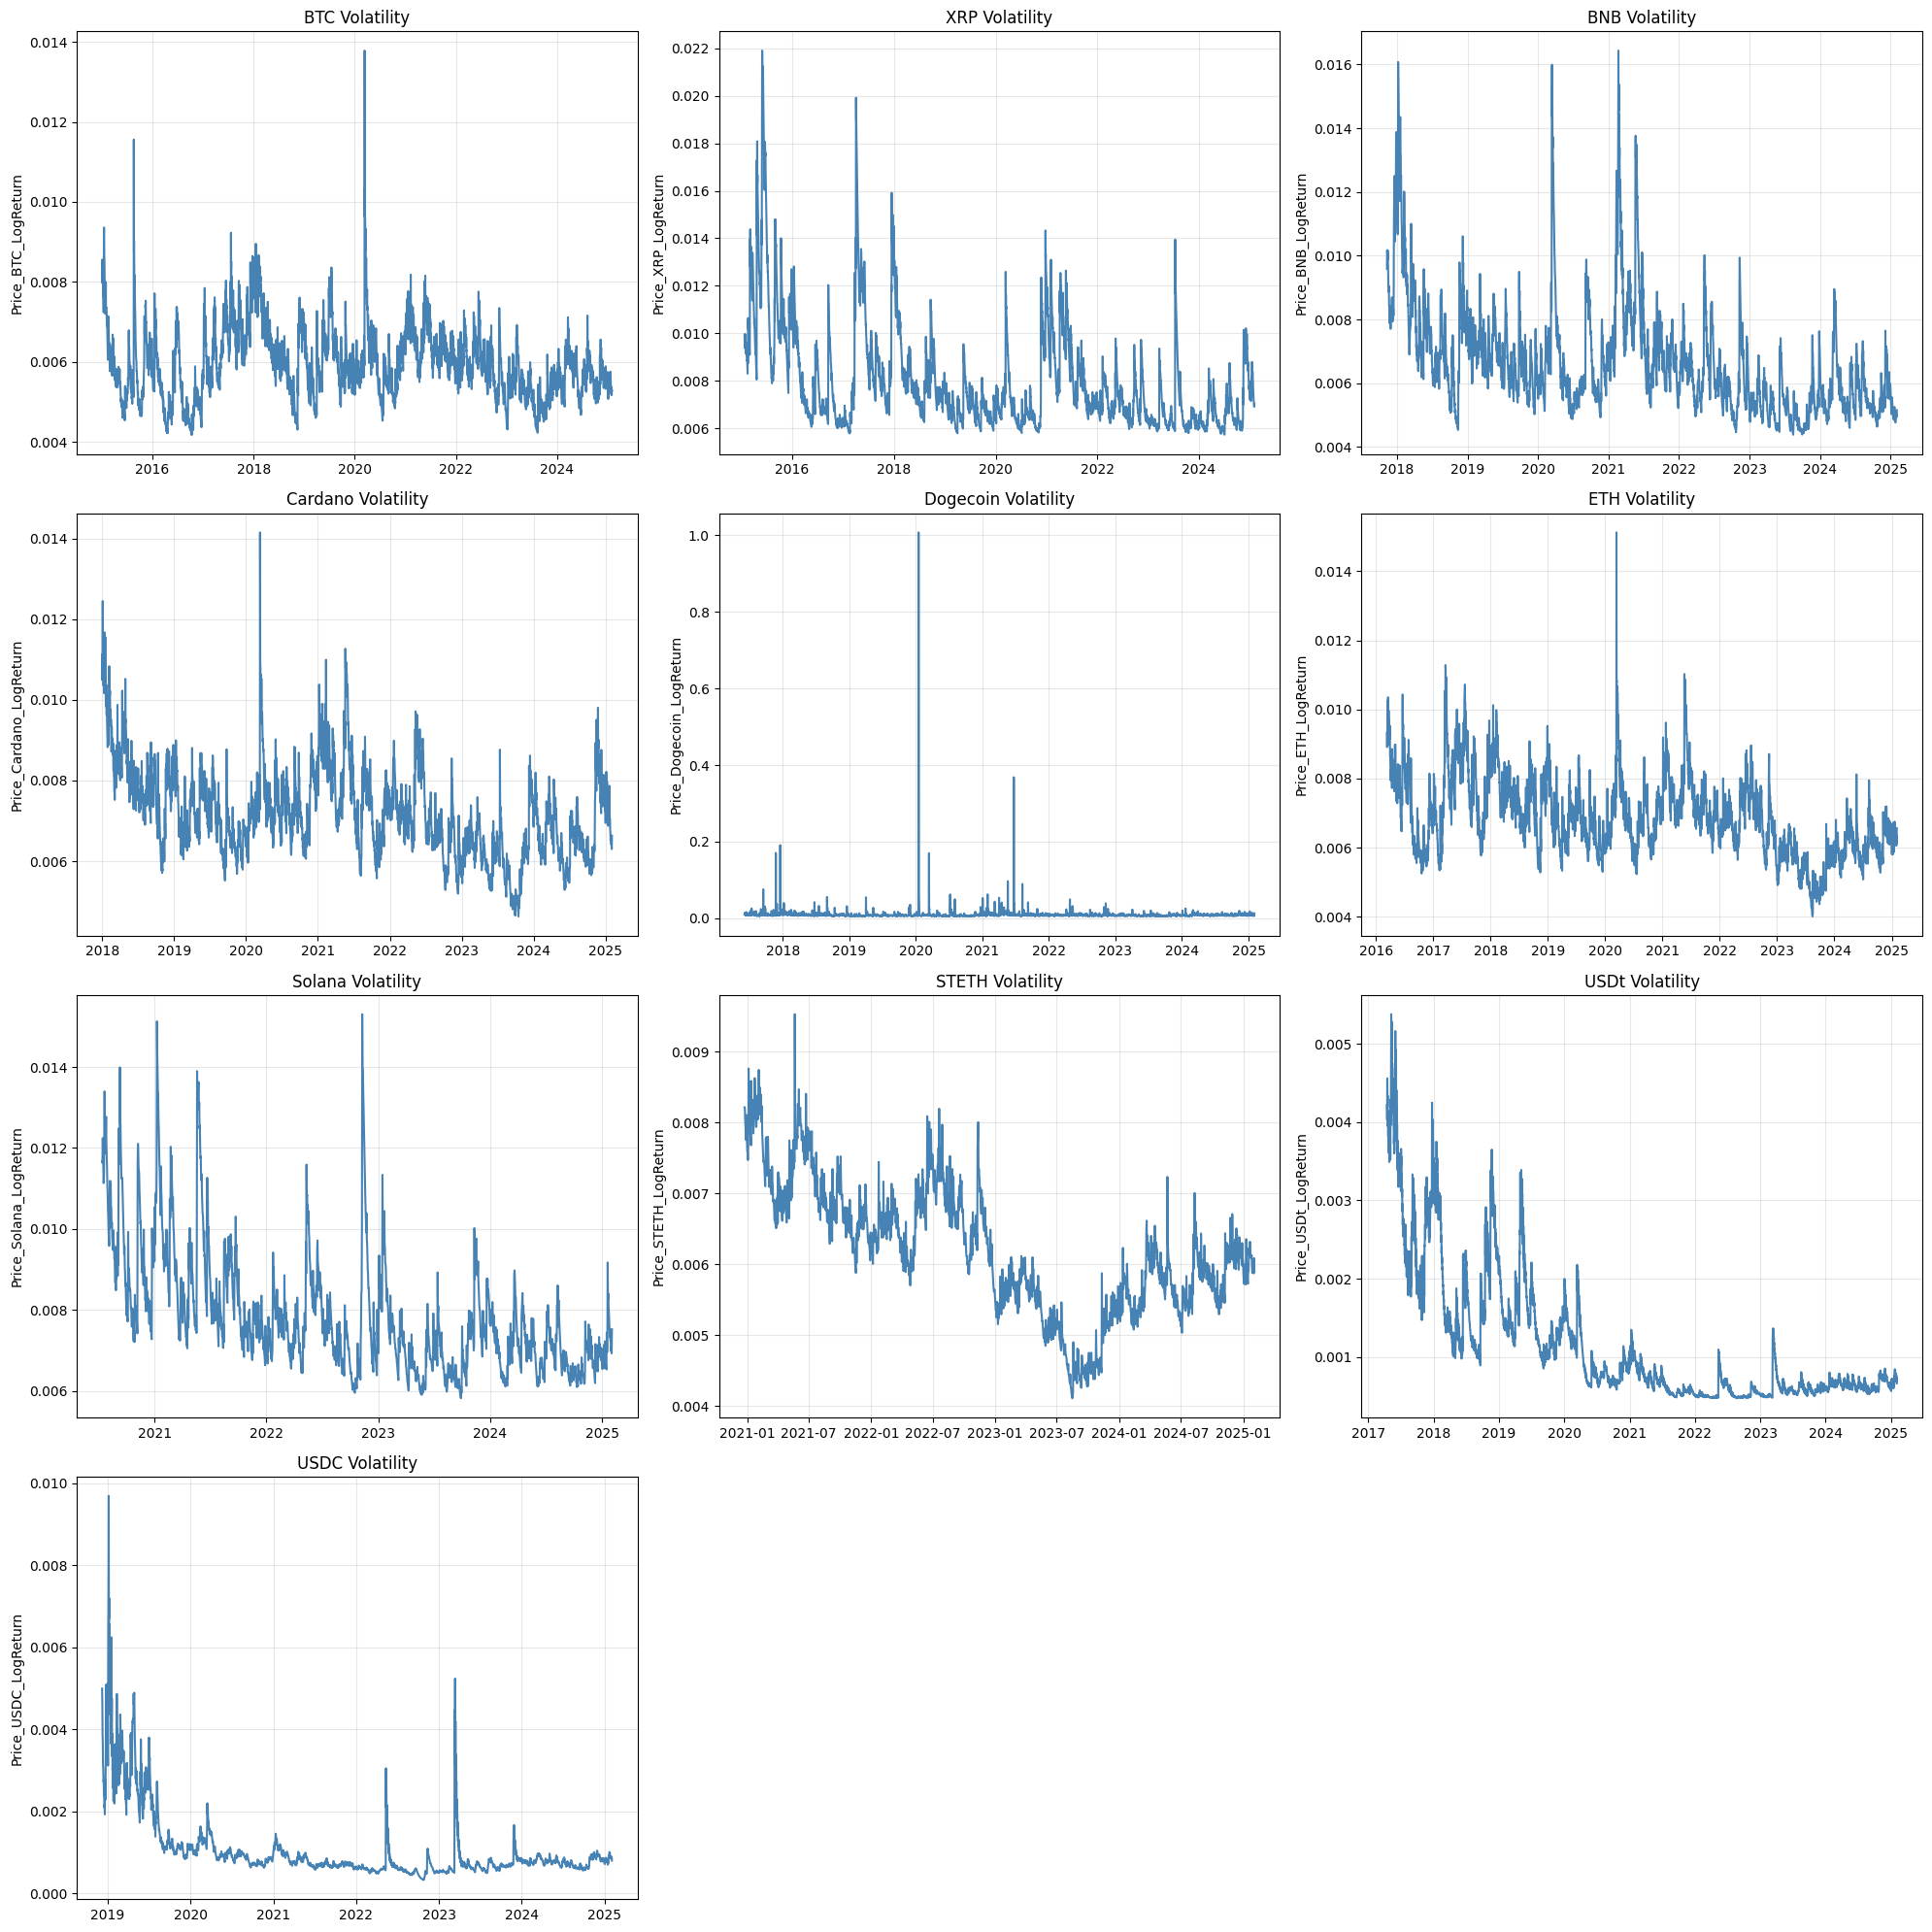

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_volatility_grid(volatility_df, cols_per_row=3):
    cryptos = volatility_df.columns.tolist()
    n = len(cryptos)
    rows = (n + cols_per_row - 1) // cols_per_row
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5*rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(cryptos):
        ax = axes[idx]
        series = volatility_df[col].dropna()
        crypto_name = col.replace('Price_', '').replace('_LogReturn', '')
        
        if not series.empty:
            sns.lineplot(data=series, ax=ax, color='steelblue', linewidth=1.5)
            ax.set_title(f'{crypto_name} Volatility', fontsize=12)
            ax.set_xlabel('')
            ax.grid(alpha=0.3)
    
    # Скрываем пустые subplots
    for j in range(len(cryptos), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_volatility_grid(volatility)

IndexError: index 10 is out of bounds for axis 0 with size 10

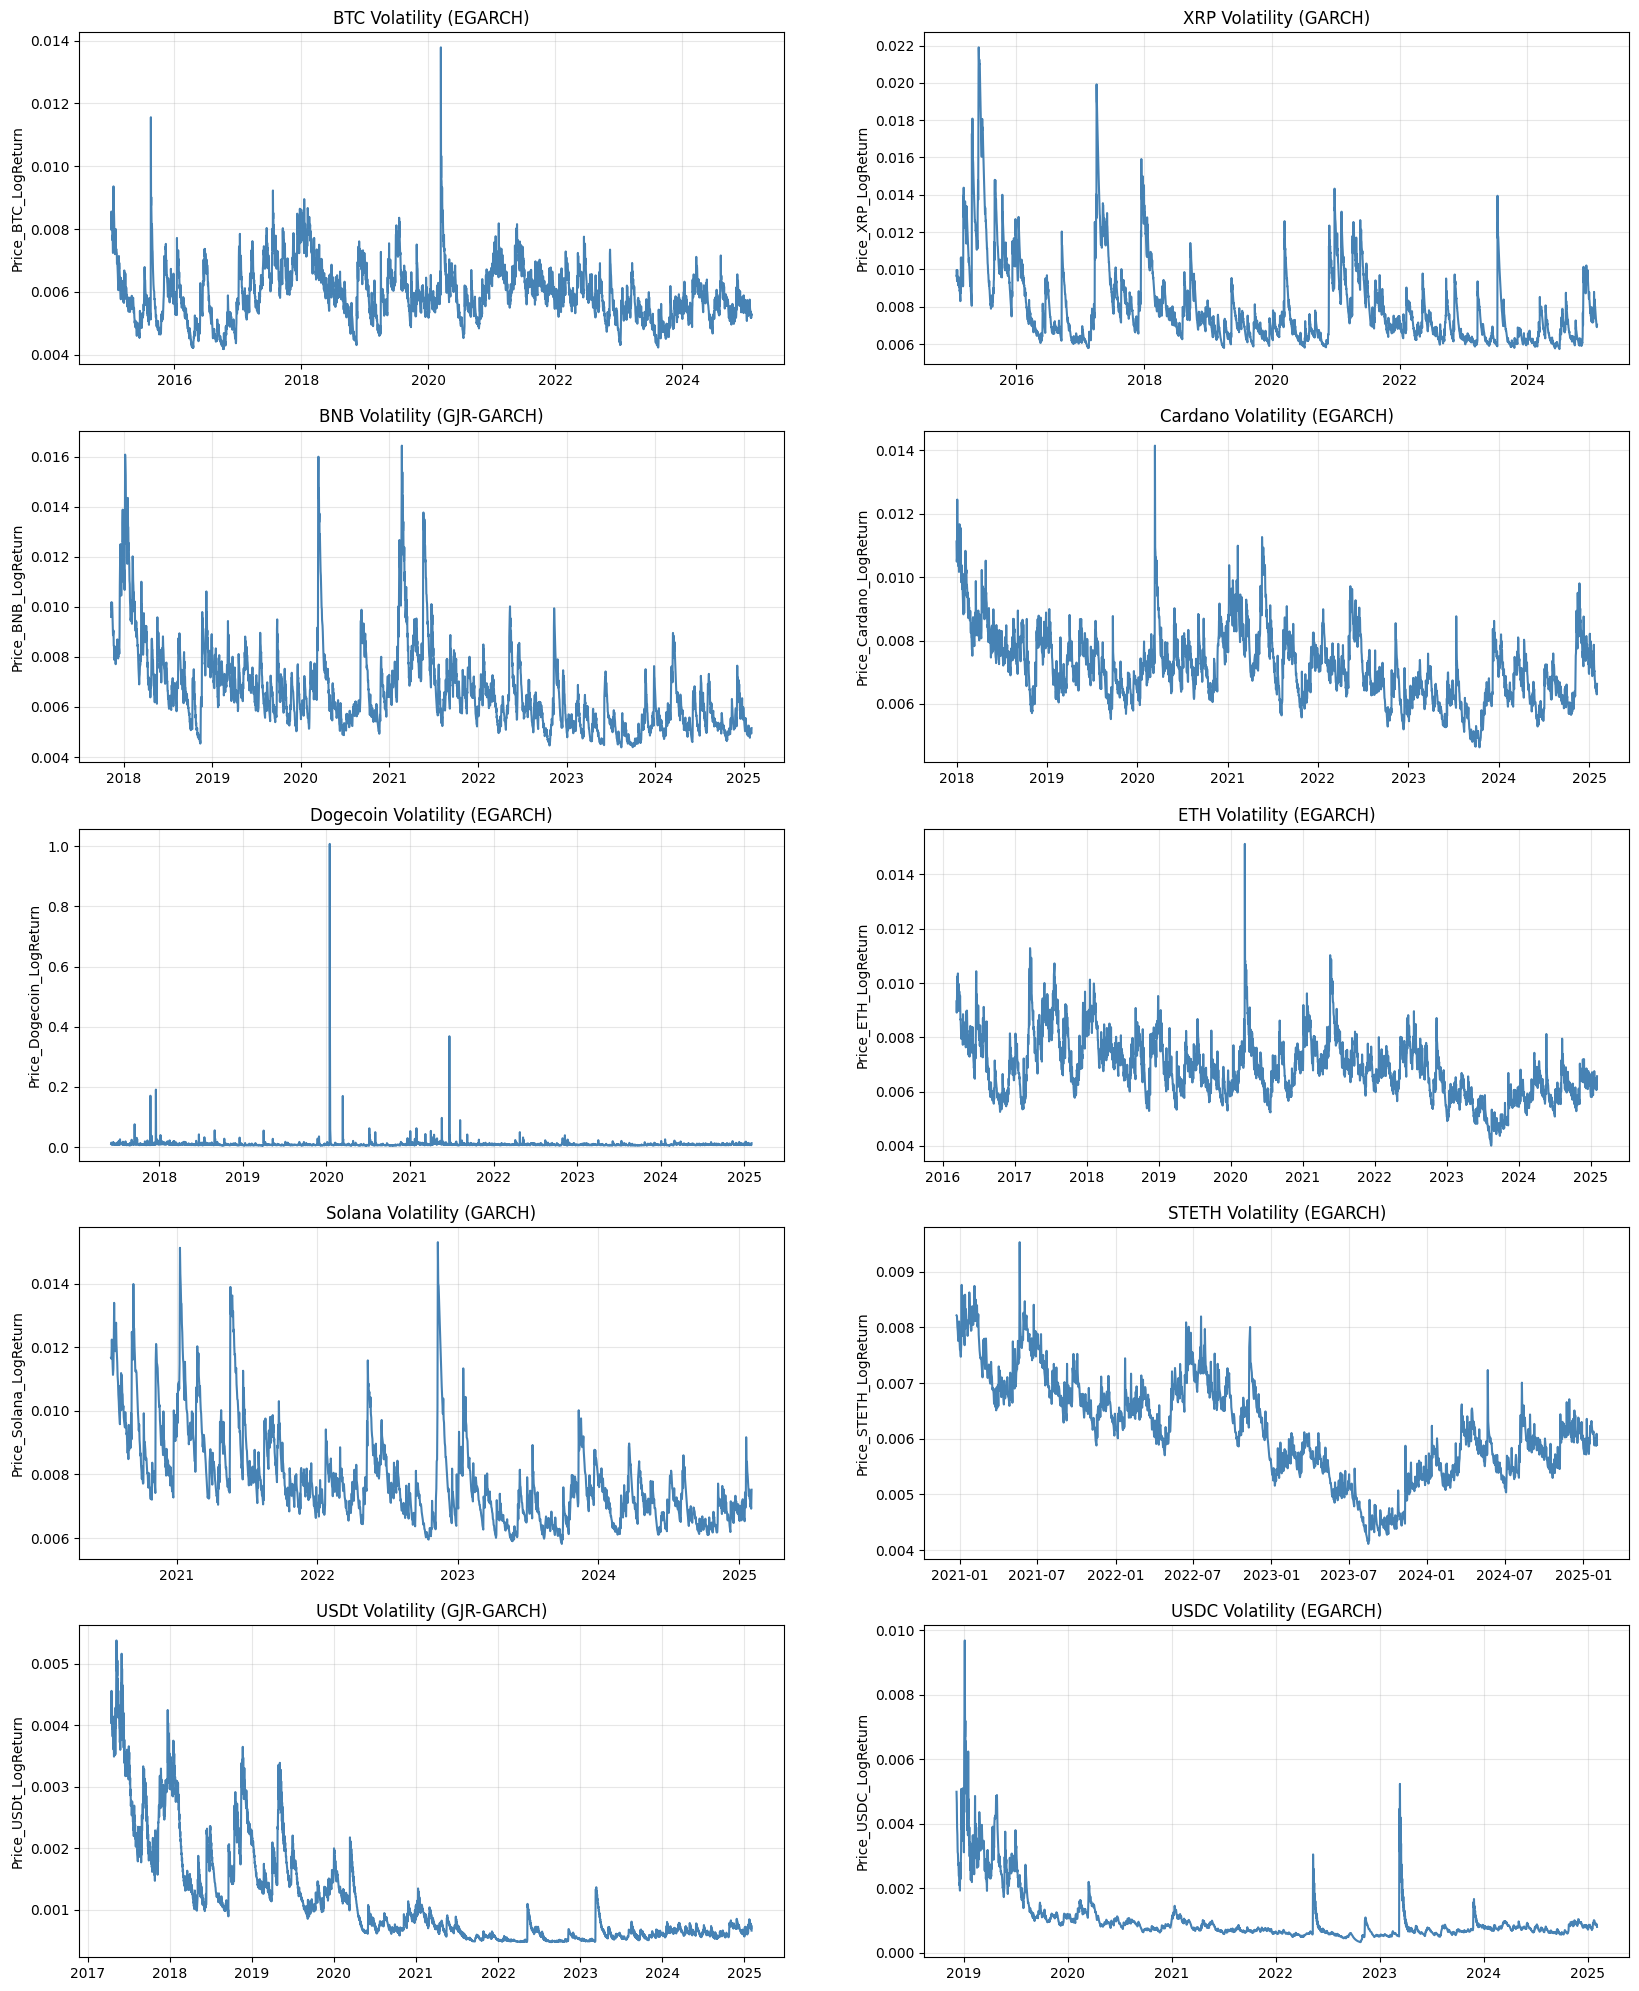

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_volatility_grid(volatility_df, models_dict, cols_per_row=2, rows=5):
    """
    Визуализирует волатильность в сетке 5x2 с указанием моделей
    """
    cryptos = volatility_df.columns.tolist()
    
    # Создаем сетку 5x2
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5*rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(cryptos):
        ax = axes[idx]
        series = volatility_df[col].dropna()
        crypto_name = col.replace('Price_', '').replace('_LogReturn', '')
        model = models_dict.get(col, '')  # Получаем модель из словаря
        
        if not series.empty:
            # Формируем заголовок с моделью
            title = f'{crypto_name} Volatility'
            if model:
                title += f' ({model})'
                
            sns.lineplot(data=series, ax=ax, color='steelblue', linewidth=1.5)
            ax.set_title(title, fontsize=12)
            ax.set_xlabel('')
            ax.grid(alpha=0.3)
    
    # Скрываем пустые subplots
    for j in range(len(cryptos), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Пример вызова
models_dict = {
    'Price_BTC_LogReturn': 'EGARCH',
    'Price_XRP_LogReturn': 'GARCH',
    'Price_BNB_LogReturn': 'GJR-GARCH',
    'Price_Cardano_LogReturn': 'EGARCH',
    'Price_Dogecoin_LogReturn': 'EGARCH',
    'Price_ETH_LogReturn': 'EGARCH',
    'Price_Solana_LogReturn': 'GARCH',
    'Price_STETH_LogReturn': 'EGARCH',
    'Price_USDt_LogReturn': 'GJR-GARCH',
    'Price_USDC_LogReturn': 'EGARCH'
}

plot_volatility_grid(volatility_df=volatility, 
                    models_dict=models_dict,
                    cols_per_row=2,
                    rows=5)


In [272]:
volatility.to_csv('volatility.csv')

In [273]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

def granger_causality_in_quantiles_troster(y, x, max_lag=1, quantiles=np.arange(0.05, 0.96, 0.05), ci_level=0.95):
    """
    Тест на причинность по Грейнджеру в квантилях (Troster, 2016, 2018).

    Параметры:
    -----------
    y : array-like
        Зависимая переменная (вызываемая)
    x : array-like
        Независимая переменная (причинитель)
    max_lag : int, default=1
        Максимальное количество лагов
    quantiles : array-like, default=np.arange(0.05, 0.96, 0.05)
        Квантили для тестирования
    ci_level : float, default=0.95
        Уровень доверия для критических значений

    Возвращает:
    --------
    results : pandas DataFrame
        DataFrame с тестовыми статистиками, p-значениями и значимостью для каждого квантиля
    """
    y = np.asarray(y)
    x = np.asarray(x)

    if len(y) != len(x):
        raise ValueError("Длина рядов y и x должна быть одинаковой")

    results = pd.DataFrame(index=quantiles,
                          columns=["Статистика Вальда", "P-значение", "Значимость"])

    # Формируем лаги
    data = pd.DataFrame({'y': y, 'x': x})
    for i in range(1, max_lag + 1):
        data[f'y_lag{i}'] = data['y'].shift(i)
        data[f'x_lag{i}'] = data['x'].shift(i)
    data = data.dropna()

    # Для каждого квантиля: квантильная регрессия и тест Вальда
    for q in quantiles:
        # Полная модель с лагами y и x
        X_full = sm.add_constant(data.filter(regex='(y_lag|x_lag)'))
        model_full = QuantReg(data['y'], X_full).fit(q=q)

        # Извлекаем коэффициенты для лагов x из полной модели
        x_lag_cols = [col for col in X_full.columns if 'x_lag' in col]
        if len(x_lag_cols) > 0:
            x_coefs = model_full.params[x_lag_cols]
            x_cov = model_full.cov_params().loc[x_lag_cols, x_lag_cols]
            # Тест Вальда для совместной значимости лагов x
            try:
                wald_stat = np.dot(np.dot(x_coefs.T, np.linalg.inv(x_cov)), x_coefs)
                p_value = 1 - stats.chi2.cdf(wald_stat, len(x_lag_cols))
            except np.linalg.LinAlgError:
                wald_stat = np.nan
                p_value = np.nan
        else:
            wald_stat = np.nan
            p_value = np.nan

        results.loc[q, "Статистика Вальда"] = wald_stat
        results.loc[q, "P-значение"] = p_value
        results.loc[q, "Значимость"] = p_value < (1 - ci_level)

    return results

def plot_quantile_causality_troster(results, title=None, save_path=None):
    """
    Визуализация результатов теста причинности по Грейнджеру в квантилях.
    """
    stat_col = 'Статистика Вальда'
    if title is None:
        title = "Параметрический тест причинности по Грейнджеру в квантилях"

    fig, ax1 = plt.subplots(figsize=(10, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Квантиль', fontsize=12)
    ax1.set_ylabel(stat_col, color=color, fontsize=12)
    ax1.plot(results.index, results[stat_col], marker='o', color=color, linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)

    # Критическое значение хи-квадрат
    df = 1  # степени свободы (для одного лага)
    critical_value = stats.chi2.ppf(0.95, df)
    ax1.axhline(y=critical_value, linestyle='--', color=color, alpha=0.7,
                label=f'5% критическое значение (χ²({df})={critical_value:.2f})')
    ax1.axhline(y=0, linestyle='-', color='k', alpha=0.3)

    # Построение p-значений на вторичной оси
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('P-значение', color=color, fontsize=12)
    ax2.plot(results.index, results["P-значение"], marker='s', color=color,
             linestyle='--', linewidth=1.5)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.axhline(y=0.05, linestyle=':', color=color, alpha=0.7, label='5% уровень значимости')
    ax2.set_ylim([0, min(1, 1.1 * results["P-значение"].max())])

    # Выделение значимых квантилей
    significant = results["Значимость"]
    if significant.any():
        ax1.scatter(results.index[significant],
                    results[stat_col][significant],
                    color='green',
                    s=100,
                    zorder=3,
                    label='Значимо при 5%')

    # Легенда
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)

    ax1.grid(True, alpha=0.3)
    ax1.set_title(title, fontsize=14)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    return fig

Разрыв
Разрыв
Разрыв


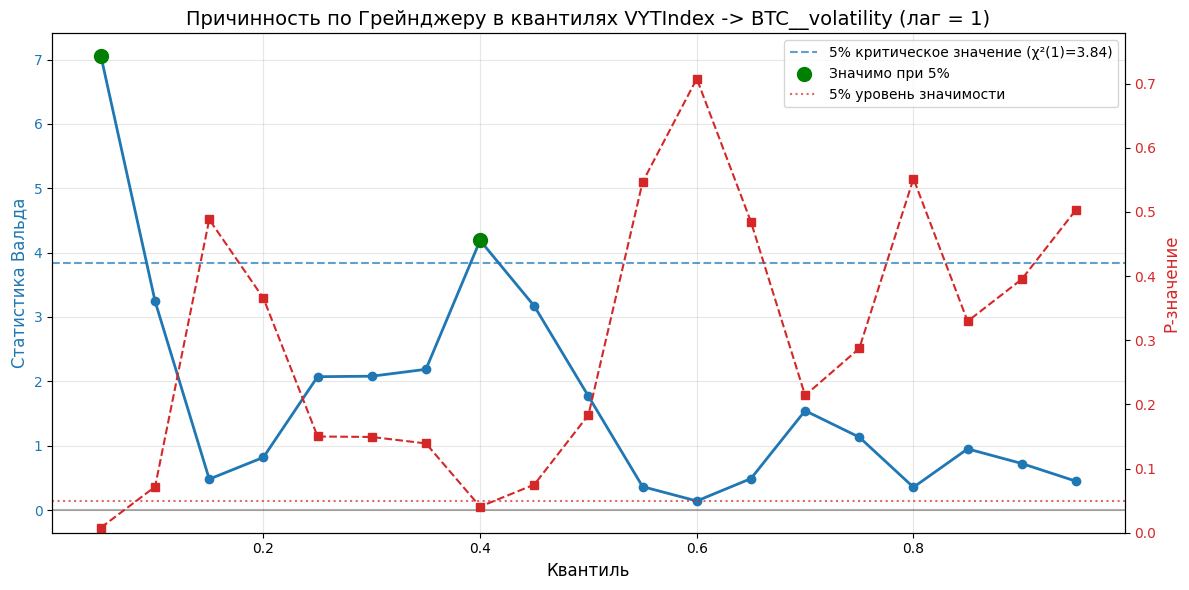

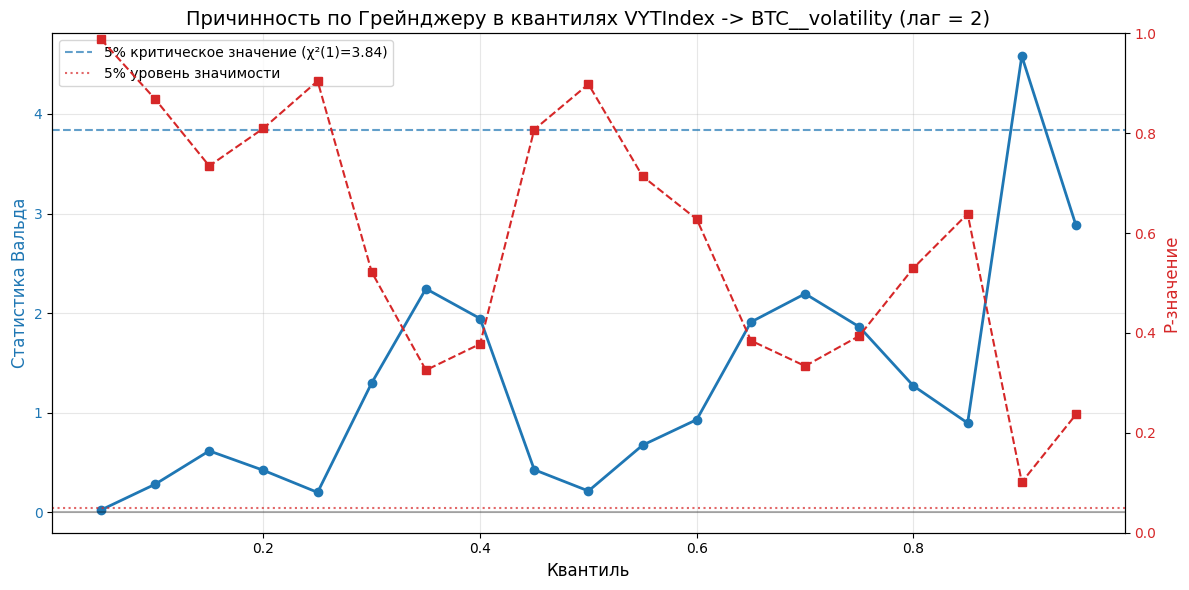

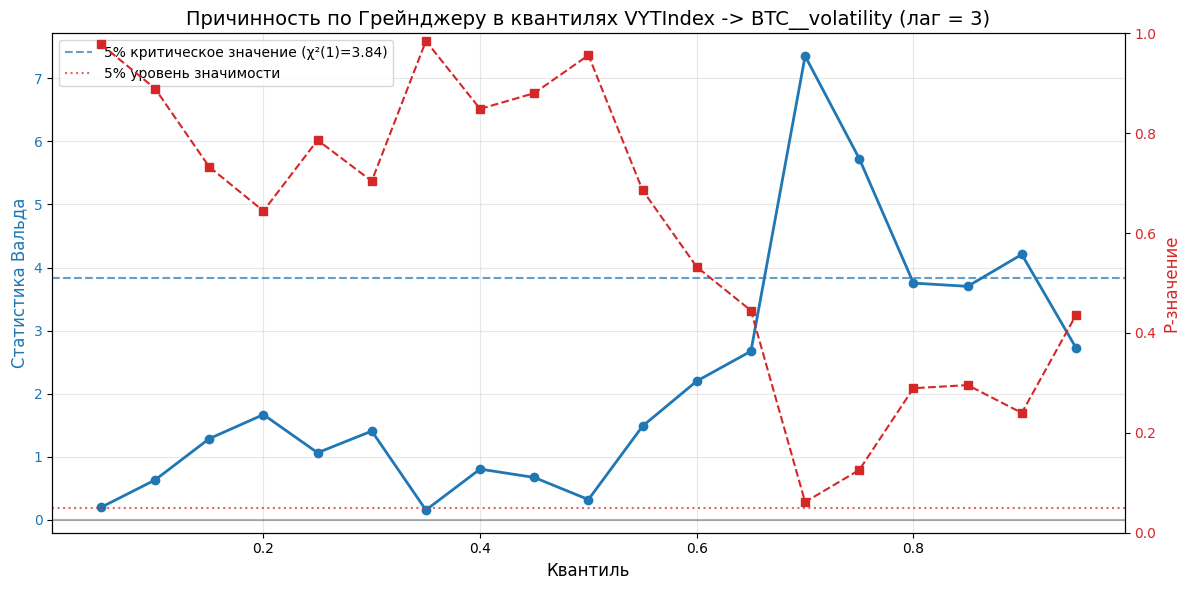

In [353]:
import time
for cr in [0]:
    for i in range(1,4):
        results = granger_causality_in_quantiles_troster(volatility[['VYTIndex', f"{volatility.columns[cr]}"]].dropna().iloc[:,:][f"{volatility.columns[cr]}"], 
                                                         volatility[['VYTIndex', f"{volatility.columns[cr]}"]].dropna().iloc[:,:]['VYTIndex'], max_lag=i)
        plot_quantile_causality_troster(results, title = f"Причинность по Грейнджеру в квантилях VYTIndex -> {log_common_df.columns[cr].replace('Price_', '').replace('LogReturn', '').replace('_Log', '')}_volatility (лаг = {i})")
        print("Разрыв")

In [355]:
import time
import os
from matplotlib import pyplot as plt

# Создаем папку для сохранения графиков
output_dir = "causality_plots"
os.makedirs(output_dir, exist_ok=True)

for cr in [1,2,3,4,5,6,7,8,9]:
    for i in range(1, 4):
        # Генерируем уникальное имя файла с timestamp
        crypto_name = log_common_df.columns[cr].replace('Price_', '').replace('LogReturn', '').replace('_Log', '')
        timestamp = time.strftime("%Y%m%d-%H%M%S")
        filename = f"{crypto_name}_lag{i}_{timestamp}.png"
        filepath = os.path.join(output_dir, filename)
        
        # Вычисляем результаты
        results = granger_causality_in_quantiles_troster(
            volatility[['VYTIndex', f"{volatility.columns[cr]}"]].dropna().iloc[:,:][f"{volatility.columns[cr]}"], 
            volatility[['VYTIndex', f"{volatility.columns[cr]}"]].dropna().iloc[:,:]['VYTIndex'], 
            max_lag=i
        )
        
        # Создаем график
        fig = plot_quantile_causality_troster(
            results, 
            title=f"Причинность по Грейнджеру в квантилях VYTIndex -> {crypto_name}_volatility (лаг = {i})"
        )
        
        # Сохраняем график
        plt.savefig(filepath, bbox_inches='tight', dpi=300)
        plt.close()  # Закрываем график для освобождения памяти
        
        print(f"График сохранен: {filepath}")
        print("Разрыв")

График сохранен: causality_plots/XRP__lag1_20250515-121622.png
Разрыв
График сохранен: causality_plots/XRP__lag2_20250515-121623.png
Разрыв
График сохранен: causality_plots/XRP__lag3_20250515-121624.png
Разрыв
График сохранен: causality_plots/BNB__lag1_20250515-121625.png
Разрыв
График сохранен: causality_plots/BNB__lag2_20250515-121625.png
Разрыв
График сохранен: causality_plots/BNB__lag3_20250515-121626.png
Разрыв
График сохранен: causality_plots/Cardano__lag1_20250515-121627.png
Разрыв
График сохранен: causality_plots/Cardano__lag2_20250515-121628.png
Разрыв
График сохранен: causality_plots/Cardano__lag3_20250515-121629.png
Разрыв
График сохранен: causality_plots/Dogecoin__lag1_20250515-121630.png
Разрыв


/Users/valery/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


График сохранен: causality_plots/Dogecoin__lag2_20250515-121630.png
Разрыв
График сохранен: causality_plots/Dogecoin__lag3_20250515-121632.png
Разрыв
График сохранен: causality_plots/ETH__lag1_20250515-121633.png
Разрыв
График сохранен: causality_plots/ETH__lag2_20250515-121634.png
Разрыв
График сохранен: causality_plots/ETH__lag3_20250515-121634.png
Разрыв
График сохранен: causality_plots/Solana__lag1_20250515-121635.png
Разрыв
График сохранен: causality_plots/Solana__lag2_20250515-121636.png
Разрыв
График сохранен: causality_plots/Solana__lag3_20250515-121637.png
Разрыв
График сохранен: causality_plots/STETH__lag1_20250515-121637.png
Разрыв
График сохранен: causality_plots/STETH__lag2_20250515-121638.png
Разрыв
График сохранен: causality_plots/STETH__lag3_20250515-121639.png
Разрыв
График сохранен: causality_plots/USDt__lag1_20250515-121640.png
Разрыв
График сохранен: causality_plots/USDt__lag2_20250515-121640.png
Разрыв
График сохранен: causality_plots/USDt__lag3_20250515-121641.png

# Для скачивания индекса неопределенности

In [278]:
index = pd.read_csv('index_df.csv', sep = '§')

/var/folders/2q/vy9xpsjj4q39tsy5d5y4ppq00000gn/T/ipykernel_62561/695771055.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  index = pd.read_csv('index_df.csv', sep = '§')


In [279]:
index.columns = ['Date', 'YTIndex', 'VYTIndex']

In [280]:
index['Date'] = pd.to_datetime(index['Date'])

In [281]:
index = index.set_index('Date')

In [282]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3380 entries, 2015-11-01 to 2025-01-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YTIndex   3380 non-null   float64
 1   VYTIndex  3380 non-null   float64
dtypes: float64(2)
memory usage: 79.2 KB


In [299]:
volatility = volatility.join(index[['VYTIndex', 'YTIndex']], how='left')

In [284]:
common_df

,Price_BTC,Price_XRP,Price_BNB,Price_Cardano,Price_Dogecoin,Price_ETH,Price_Solana,Price_STETH,Price_USDt,Price_USDC,VYTIndex,YTIndex
Date,,,,,,,,,,,,
2015-01-01,313.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,258.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,273.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-29,103780.0,3.0679,667.78,0.9400,0.323964,3113.26,227.948,3074.9516,1.0000,1.0000,1.899213,-2.0
2025-01-30,104740.0,3.1274,677.43,0.9596,0.331504,3247.22,238.667,3113.0711,1.0001,0.9999,1.758014,-4.0
2025-01-31,102470.0,3.0349,677.48,0.9423,0.328821,3298.69,231.749,3247.2291,0.9997,1.0003,1.803546,1.0
